In [83]:
# Use conda env "human_pose" for kernel
from pathlib import Path
import cv2
import numpy as np

In [84]:
%matplotlib inline
from matplotlib import pyplot as plt

# Load Ego4d Images

In [85]:
img_path = "/home/kz/Desktop/Research/NeuS2-official/ego4d-data-process/segmentation/single_frame/012960/hand/gp05_0/012960-lh_json/img.png"
msk_path = "/home/kz/Desktop/Research/NeuS2-official/ego4d-data-process/segmentation/single_frame/012960/hand/gp05_0/012960-lh_json/label.png"

In [86]:
# Read the original image with color mode (BGR)
img = cv2.imread(img_path)
print(img.shape)

(2160, 3840, 3)


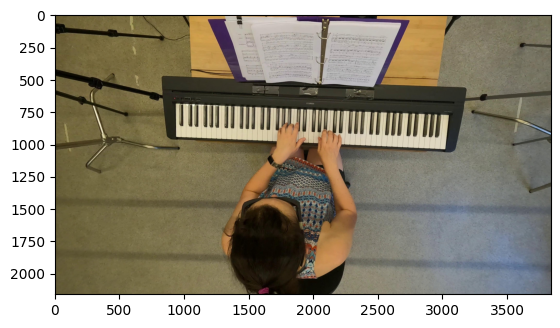

In [87]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

In [88]:
# Read the mask with grayscale mode.
msk = cv2.imread(msk_path, 0) 
print(msk.shape)

(2160, 3840)


In [89]:
# Check the unique elements of msk
# msk only has values 0 and 38, we want to make non-zero values 255
values, counts = np.unique(msk, return_counts=True)
print(values)
print(counts)

[ 0 38]
[8246135   48265]


In [90]:
# Make non-zero values 255
msk[msk!=0] = 255

In [91]:
# Check the unique elements of msk
# msk should now only has values 0 and 255
values, counts = np.unique(msk, return_counts=True)
print(values)
print(counts)

[  0 255]
[8246135   48265]


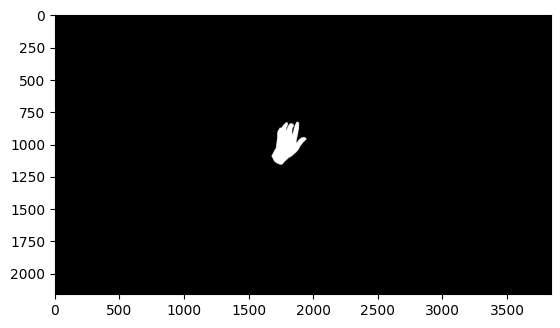

In [92]:
plt.imshow(msk, cmap='gray')
plt.show()

# Concatenate original image with the mask channel

`numpy.concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind")`

https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

Join a sequence of arrays along an existing axis.

- `axis`: The axis along which the arrays will be joined. If axis is None, arrays are flattened before use. Default is 0.



In [93]:
print(img.shape)
print(msk.shape)

(2160, 3840, 3)
(2160, 3840)


Insert a new axis within a NumPy array: use `np.newaxis`

https://www.geeksforgeeks.org/insert-a-new-axis-within-a-numpy-array/

In [94]:
print(img.shape)
print(msk[:, :, np.newaxis].shape)

(2160, 3840, 3)
(2160, 3840, 1)


In [95]:
# Concatenate original image with mask channel
# Concatenate img and msk along last axis
image = np.concatenate([img, msk[:, :, np.newaxis]], axis=-1)

In [96]:
print(image.shape)

(2160, 3840, 4)


In [97]:
out_path = "/home/kz/Desktop/Research/NeuS2-official/ego4d-data-process/segmentation/single_frame/012960/hand/gp05_0/012960-lh.png"

In [98]:
cv2.imwrite(out_path, image)

True

In [99]:
read_out = cv2.imread(out_path, cv2.IMREAD_UNCHANGED)

In [100]:
print(read_out.shape)

(2160, 3840, 4)


In [101]:
# Check the unique elements of tha alpha channel
values, counts = np.unique(read_out[:, :, 3], return_counts=True)
print(values)
print(counts)

[  0 255]
[8246135   48265]


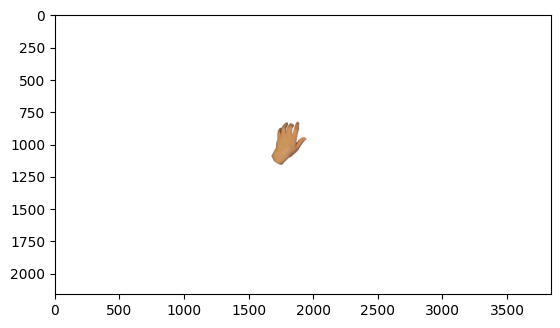

In [102]:
out_image = cv2.cvtColor(read_out, cv2.COLOR_BGRA2RGBA)
plt.imshow(out_image)
plt.show()